WeatherPy

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# URL for API
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="


#Getting the different city information from the API
city_data = pd.DataFrame({"City": cities})
city_data["Cloudiness"] = ""
city_data["Country"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

for index, row in city_data.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:
        print(f"Processing Record {index + 1} of {len(cities)} | {city}")
        
        city_data.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_data.loc[index, "Country"] = response["sys"]["country"]
        city_data.loc[index, "Date"] = response["dt"]
        city_data.loc[index, "Humidity"] = response["main"]["humidity"]
        city_data.loc[index, "Lat"] = response["coord"]["lat"]
        city_data.loc[index, "Lng"] = response["coord"]["lon"]
        city_data.loc[index, "Max Temp"] = response["main"]["temp_max"]
        city_data.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of 621 | rikitea
Processing Record 2 of 621 | arman
Processing Record 3 of 621 | port alfred
Processing Record 4 of 621 | ushuaia
Processing Record 5 of 621 | mataura
Processing Record 6 of 621 | severo-kurilsk
Processing Record 7 of 621 | grootfontein
Processing Record 8 of 621 | hilo
Processing Record 9 of 621 | nizhneyansk
City not found. Skipping...
Processing Record 10 of 621 | bengkulu
Processing Record 11 of 621 | duma
Processing Record 12 of 621 | bredasdorp
Processing Record 13 of 621 | codrington
Processing Record 14 of 621 | talnakh
Processing Record 15 of 621 | punta arenas
Processing Record 16 of 621 | luwuk
Processing Record 17 of 621 | bandar-e torkaman
City not found. Skipping...
Processing Record 18 of 621 | pedasi
Processing Record 19 of 621 | norman wells
Processing Record 20 of 621 | benicarlo
Processing Record 21 of 621 | cam pha
City not found. Skipping...
Processing Record 22 of 621 | cape town
Processing Record 23 of 621 | alyangula
Processin

Processing Record 193 of 621 | samana
Processing Record 194 of 621 | san fernando
Processing Record 195 of 621 | los llanos de aridane
Processing Record 196 of 621 | buin
Processing Record 197 of 621 | bintulu
Processing Record 198 of 621 | palana
Processing Record 199 of 621 | faanui
Processing Record 200 of 621 | upernavik
Processing Record 201 of 621 | khani
Processing Record 202 of 621 | otane
Processing Record 203 of 621 | acapulco
Processing Record 204 of 621 | carauari
Processing Record 205 of 621 | pemangkat
Processing Record 206 of 621 | villafranca de los barros
Processing Record 207 of 621 | tuktoyaktuk
Processing Record 208 of 621 | ust-omchug
Processing Record 209 of 621 | ilulissat
Processing Record 210 of 621 | selikhino
Processing Record 211 of 621 | sorland
Processing Record 212 of 621 | nikolskoye
Processing Record 213 of 621 | belmonte
Processing Record 214 of 621 | tuatapere
Processing Record 215 of 621 | namibe
Processing Record 216 of 621 | bonavista
Processing Re

Processing Record 384 of 621 | merritt island
Processing Record 385 of 621 | umm lajj
Processing Record 386 of 621 | ponta do sol
Processing Record 387 of 621 | am timan
Processing Record 388 of 621 | santiago
Processing Record 389 of 621 | lakselv
Processing Record 390 of 621 | visnes
Processing Record 391 of 621 | suclayin
Processing Record 392 of 621 | shelburne
Processing Record 393 of 621 | nan
Processing Record 394 of 621 | artyk
City not found. Skipping...
Processing Record 395 of 621 | armacao dos buzios
City not found. Skipping...
Processing Record 396 of 621 | gorno-chuyskiy
City not found. Skipping...
Processing Record 397 of 621 | savannah bight
Processing Record 398 of 621 | lolua
City not found. Skipping...
Processing Record 399 of 621 | burgos
Processing Record 400 of 621 | tayu
Processing Record 401 of 621 | williams lake
Processing Record 402 of 621 | puerto princesa
Processing Record 403 of 621 | puerto carreno
Processing Record 404 of 621 | uruzgan
Processing Record 

Processing Record 575 of 621 | laguna de perlas
Processing Record 576 of 621 | geilo
Processing Record 577 of 621 | carutapera
Processing Record 578 of 621 | bambari
Processing Record 579 of 621 | santa cruz cabralia
Processing Record 580 of 621 | roma
Processing Record 581 of 621 | kitimat
Processing Record 582 of 621 | taksimo
Processing Record 583 of 621 | zhigansk
Processing Record 584 of 621 | san matias
Processing Record 585 of 621 | gifhorn
Processing Record 586 of 621 | skagastrond
City not found. Skipping...
Processing Record 587 of 621 | celestun
Processing Record 588 of 621 | ngunguru
Processing Record 589 of 621 | portoferraio
Processing Record 590 of 621 | pakwach
City not found. Skipping...
Processing Record 591 of 621 | brufut
Processing Record 592 of 621 | ajdabiya
Processing Record 593 of 621 | hearst
Processing Record 594 of 621 | louisbourg
City not found. Skipping...
Processing Record 595 of 621 | balakliya
Processing Record 596 of 621 | cherepovets
Processing Recor

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [4]:
#Remove unknown city data
city_data = city_data[city_data["Country"] !=""]
city_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [5]:
#Convert to a CSV and show the data
city_data.to_csv(cities_file)

city_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,61,PF,1586749115,77,-23.12,-134.97,77.7,18.05
1,arman,100,RU,1586749115,94,59.7,150.17,25.32,4.07
2,port alfred,12,ZA,1586749116,79,-33.59,26.89,57.99,3
3,ushuaia,90,AR,1586748920,81,-54.8,-68.3,42.8,11.41
4,mataura,99,NZ,1586748923,83,-46.19,168.86,45,11.99
5,severo-kurilsk,95,RU,1586749116,93,50.68,156.12,30.72,10.02
6,grootfontein,14,NA,1586749117,52,-19.57,18.12,61.39,2.62
7,hilo,90,US,1586749117,73,19.73,-155.09,77,6.93
9,bengkulu,36,ID,1586748978,58,-3.8,102.27,87.44,1.28
10,duma,100,CN,1586749118,20,34.77,108.14,62.6,4.47


Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

In [18]:
#Create a scatter plot for Latitude vs Temperature

temp_x = city_data['Lat'];
temp_y = city_data['Max Temp']

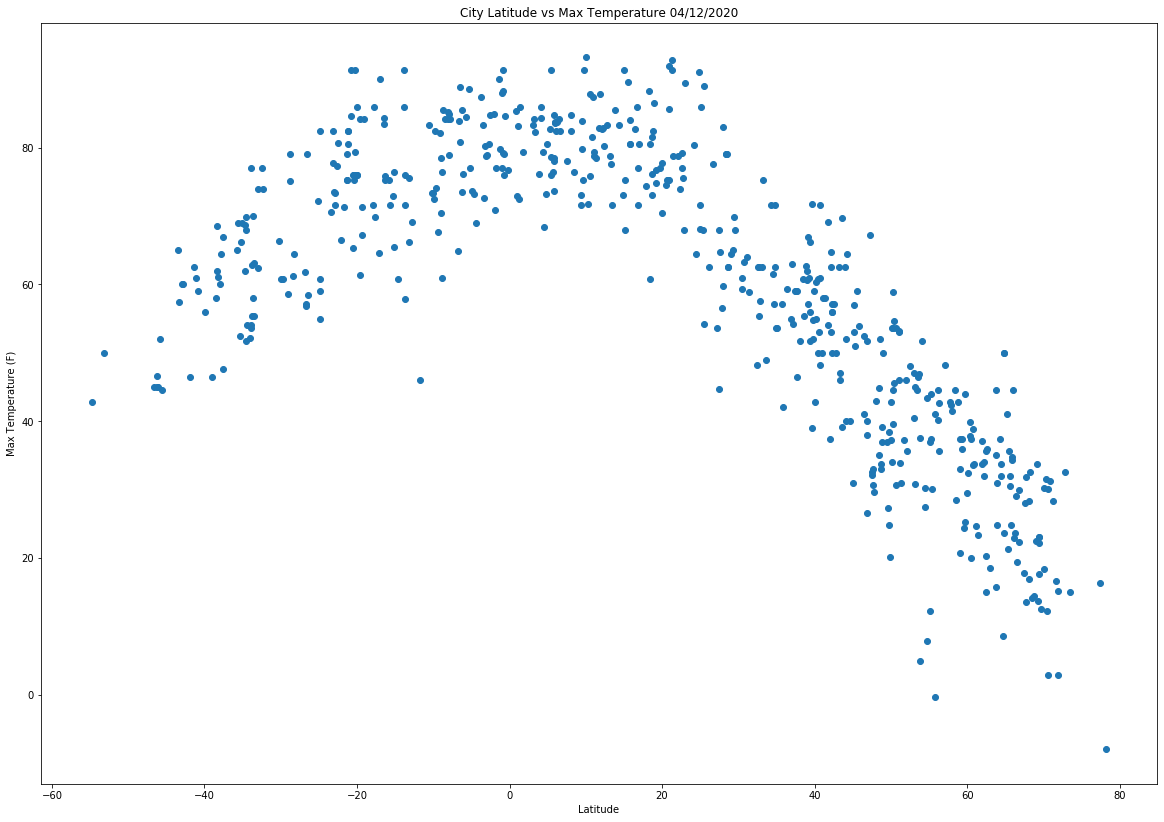

In [19]:
plt.figure(figsize=(20,14))

plt.title("City Latitude vs Max Temperature 04/12/2020")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.scatter (temp_x,temp_y)

plt.savefig('Latitude vs Temp.png')

Latitude vs. Humidity Plot

In [11]:
#Create a scatter plot for Latitude vs Humidity

humid_x = city_data['Lat'];
humid_y = city_data['Humidity']

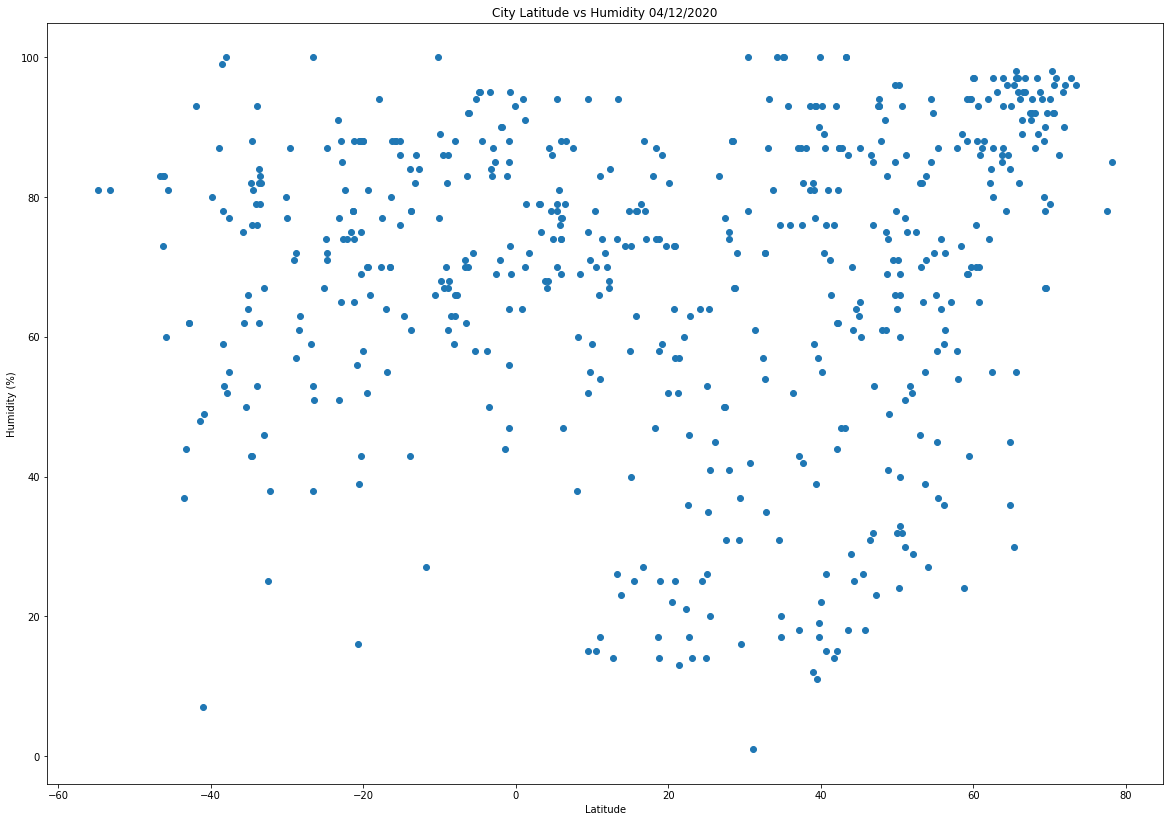

In [12]:
plt.figure(figsize=(20,14))

plt.title("City Latitude vs Humidity 04/12/2020")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.scatter (humid_x,humid_y)

plt.savefig('Latitude vs Humidity.png')

Latitude vs. Cloudiness Plot

In [13]:
#Create a scatter plot for Latitude vs Cloudiness

cloud_x = city_data['Lat'];
cloud_y = city_data['Cloudiness']

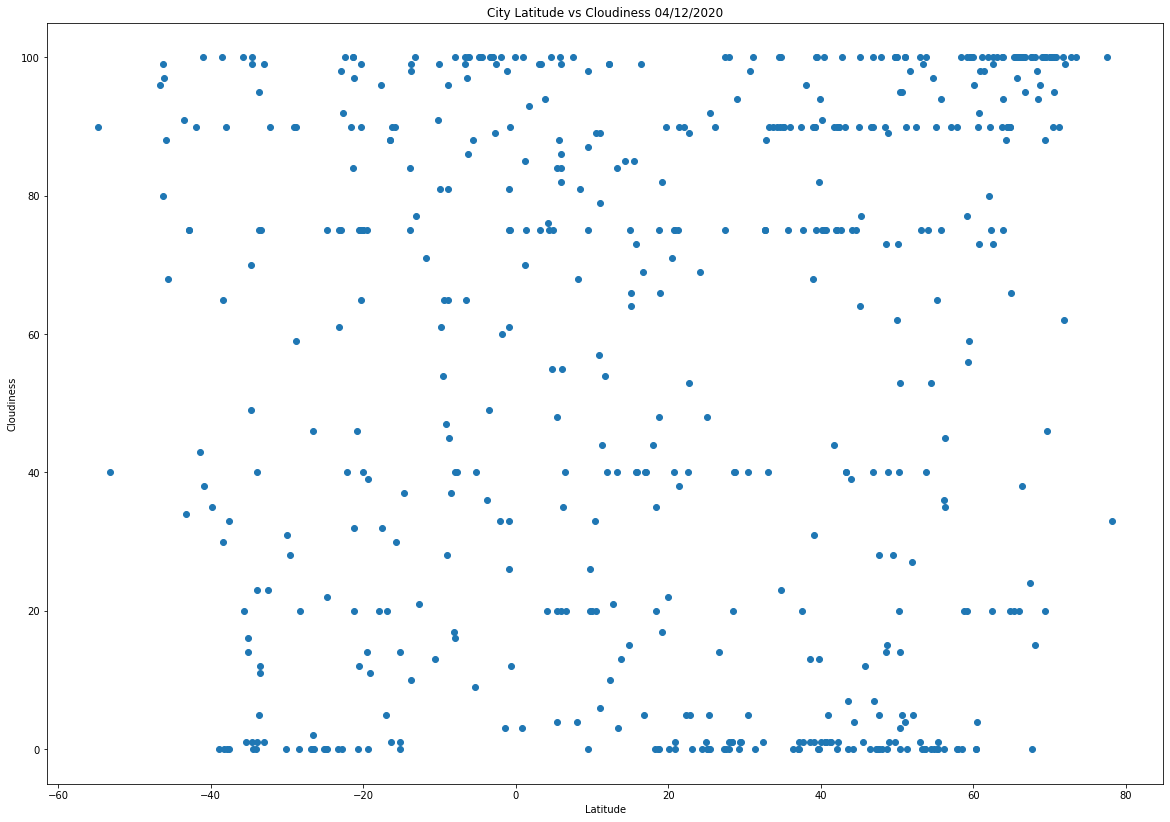

In [14]:
plt.figure(figsize=(20,14))

plt.title("City Latitude vs Cloudiness 04/12/2020")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.scatter (cloud_x,cloud_y)

plt.savefig('Latitude vs Cloudiness.png')

 Latitude vs. Wind Speed Plot

In [15]:
#Create a scatter plot for Latitude vs Wind Speed

wind_x = city_data['Lat'];
wind_y = city_data['Wind Speed']

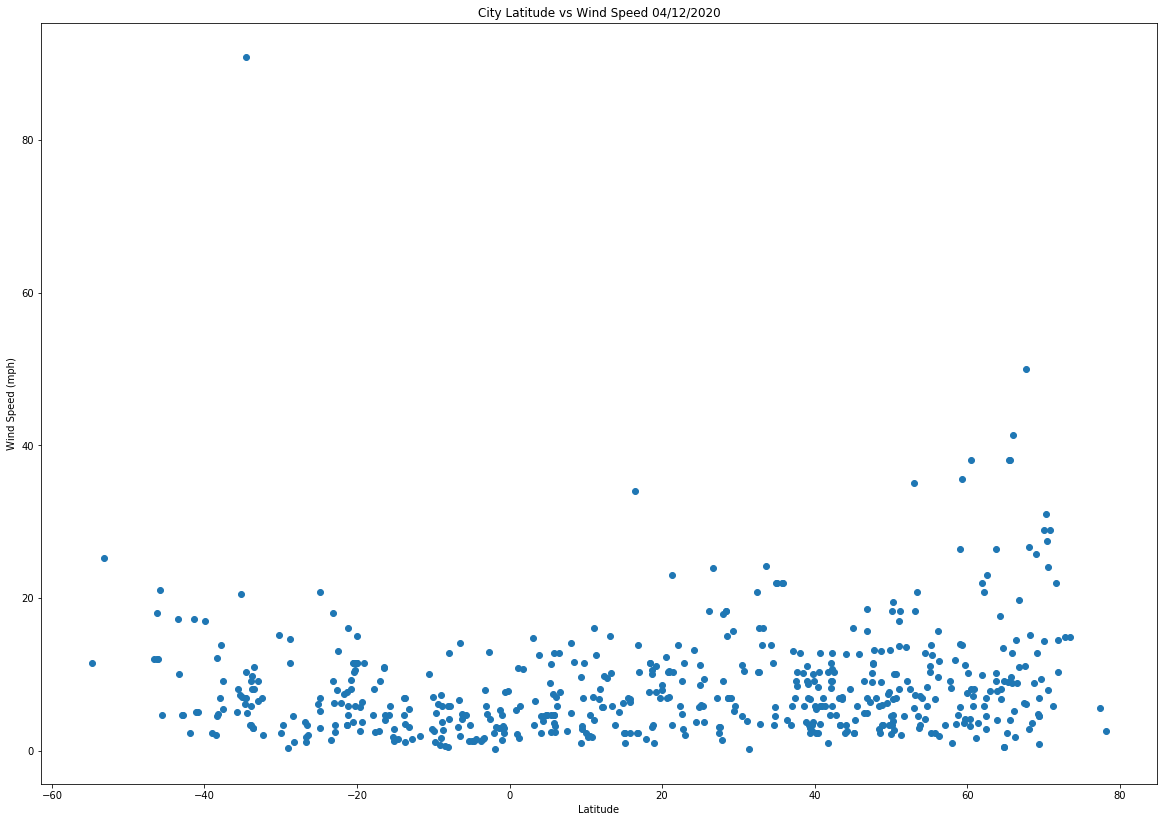

In [16]:
plt.figure(figsize=(20,14))

plt.title("City Latitude vs Wind Speed 04/12/2020")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.scatter (wind_x,wind_y)

plt.savefig('Latitude vs Wind Speed.png')